# 1. Carga de Datos
Se cargan 4 datasets relacionados a partidos y jugadores de la Premier League.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ruta_base = 'D:\\RENATO\\Desktop\\data_raw\\'

# Cargando los archivos
df_partidos = pd.read_csv(ruta_base + 'partidos_2324.csv')
df_jugadores = pd.read_csv(ruta_base + 'jugadores_2324.csv')
df_estadisticas_avanzadas = pd.read_csv(ruta_base + 'estadisticas_avanzadas_2324.csv')
df_calendario = pd.read_csv(ruta_base + 'calendario_resultados_2324.csv')

In [3]:
# Vista rápida
print(df_partidos.head())

   Unnamed: 0        Date   Time            Comp        Round  Day Venue  \
0           1  2023-08-11  20:00  Premier League  Matchweek 1  Fri  Away   
1           3  2023-08-19  20:00  Premier League  Matchweek 2  Sat  Home   
2           4  2023-08-27  14:00  Premier League  Matchweek 3  Sun  Away   
3           5  2023-09-02  15:00  Premier League  Matchweek 4  Sat  Home   
4           6  2023-09-16  15:00  Premier League  Matchweek 5  Sat  Away   

  Result  GF  GA  ...  Match Report  Notes    Sh   SoT  Dist   FK PK PKatt  \
0      W   3   0  ...  Match Report    NaN  17.0   8.0  13.9  0.0  0     0   
1      W   1   0  ...  Match Report    NaN  14.0   4.0  17.9  0.0  0     0   
2      W   2   1  ...  Match Report    NaN  29.0   9.0  17.3  2.0  0     1   
3      W   5   1  ...  Match Report    NaN   6.0   4.0  14.8  0.0  1     1   
4      W   3   1  ...  Match Report    NaN  29.0  13.0  16.4  1.0  0     0   

  Season            Team  
0   2024  ManchesterCity  
1   2024  Manchester

In [4]:
print(df_partidos.columns)
print(df_jugadores.columns)
print(df_estadisticas_avanzadas.columns)
print(df_calendario.columns)


Index(['Unnamed: 0', 'Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result',
       'GF', 'GA', 'Opponent', 'xG', 'xGA', 'Poss', 'Attendance', 'Captain',
       'Formation', 'Referee', 'Match Report', 'Notes', 'Sh', 'SoT', 'Dist',
       'FK', 'PK', 'PKatt', 'Season', 'Team'],
      dtype='object')
Index(['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG',
       'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls_90', 'Ast_90', 'G+A_90',
       'G-PK_90', 'G+A-PK_90', 'xG_90', 'xAG_90', 'xG+xAG_90', 'npxG_90',
       'npxG+xAG_90', 'Team'],
      dtype='object')
Index(['Match Number', 'Round Number', 'Date', 'Location', 'Home Team',
       'Away Team', 'Result'],
      dtype='object')
Index(['File_name', 'Column_names'], dtype='object')


## 2. Limpieza de Datos
 Correcciones de nombres de equipos, eliminación de nulos.

In [5]:
print(df_partidos.isnull().sum())
print(df_jugadores.isnull().sum())
print(df_estadisticas_avanzadas.isnull().sum())
print(df_calendario.isnull().sum())


Unnamed: 0        0
Date              0
Time              0
Comp              0
Round             0
Day               0
Venue             0
Result            0
GF                0
GA                0
Opponent          0
xG                0
xGA               0
Poss              0
Attendance        0
Captain           0
Formation         0
Referee           0
Match Report      0
Notes           760
Sh                0
SoT               0
Dist              0
FK                0
PK                0
PKatt             0
Season            0
Team              0
dtype: int64
Player         0
Nation         0
Pos            0
Age            0
MP             0
Starts         0
Min            0
90s            0
Gls            0
Ast            0
G+A            0
G-PK           0
PK             0
PKatt          0
CrdY           0
CrdR           0
xG             0
npxG           0
xAG            0
npxG+xAG       0
PrgC           0
PrgP           0
PrgR           0
Gls_90         0
Ast_90         0
G+

In [6]:
# Eliminar columna 'Unnamed: 0' de df_partidos
df_partidos = df_partidos.drop(columns=['Unnamed: 0'])

# (df_jugadores y df_calendario no tienen 'Unnamed: 0', así que no hay que hacer nada ahí)

# Vistazo rápido después de limpiar
print(df_partidos.head())
print(df_jugadores.head())
print(df_calendario.head())


         Date   Time            Comp        Round  Day Venue Result  GF  GA  \
0  2023-08-11  20:00  Premier League  Matchweek 1  Fri  Away      W   3   0   
1  2023-08-19  20:00  Premier League  Matchweek 2  Sat  Home      W   1   0   
2  2023-08-27  14:00  Premier League  Matchweek 3  Sun  Away      W   2   1   
3  2023-09-02  15:00  Premier League  Matchweek 4  Sat  Home      W   5   1   
4  2023-09-16  15:00  Premier League  Matchweek 5  Sat  Away      W   3   1   

        Opponent  ...  Match Report  Notes    Sh   SoT  Dist   FK PK PKatt  \
0        Burnley  ...  Match Report    NaN  17.0   8.0  13.9  0.0  0     0   
1  Newcastle Utd  ...  Match Report    NaN  14.0   4.0  17.9  0.0  0     0   
2  Sheffield Utd  ...  Match Report    NaN  29.0   9.0  17.3  2.0  0     1   
3         Fulham  ...  Match Report    NaN   6.0   4.0  14.8  0.0  1     1   
4       West Ham  ...  Match Report    NaN  29.0  13.0  16.4  1.0  0     0   

   Season            Team  
0    2024  ManchesterCity  


In [21]:
# 🔵 Corrección de nombres en 'Team' y 'Opponent' de df_partidos

# Diccionario general de correcciones
equipos_correcciones = {
    'ManchesterCity': 'Manchester City',
    'Arsenal': 'Arsenal',
    'Liverpool': 'Liverpool',
    'AstonVilla': 'Aston Villa',
    'TottenhamHotspur': 'Tottenham Hotspur',
    'Chelsea': 'Chelsea',
    'NewcastleUnited': 'Newcastle United',
    'ManchesterUnited': 'Manchester United',
    'WestHamUnited': 'West Ham United',
    'CrystalPalace': 'Crystal Palace',
    'BrightonandHoveAlbion': 'Brighton',
    'Bournemouth': 'Bournemouth',
    'Fulham': 'Fulham',
    'WolverhamptonWanderers': 'Wolverhampton',
    'Everton': 'Everton',
    'Brentford': 'Brentford',
    'NottinghamForest': 'Nottingham Forest',
    'LutonTown': 'Luton Town',
    'Burnley': 'Burnley',
    'SheffieldUnited': 'Sheffield United',
    'Newcastle Utd': 'Newcastle United',
    'Sheffield Utd': 'Sheffield United',
    'West Ham': 'West Ham United',
    "Nott'ham Forest": 'Nottingham Forest',
    'Wolves': 'Wolverhampton',
    'Manchester Utd': 'Manchester United',
    'Tottenham': 'Tottenham Hotspur'
}

# Aplicar correcciones tanto a 'Team' como 'Opponent'
df_partidos['Team'] = df_partidos['Team'].replace(equipos_correcciones)
df_partidos['Opponent'] = df_partidos['Opponent'].replace(equipos_correcciones)

# Confirmar cambios
print("Teams corregidos:\n", sorted(df_partidos['Team'].unique()))
print("\nOpponents corregidos:\n", sorted(df_partidos['Opponent'].unique()))



Teams corregidos:
 ['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton', 'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Liverpool', 'Luton Town', 'Manchester City', 'Manchester United', 'Newcastle United', 'Nottingham Forest', 'Sheffield United', 'Tottenham Hotspur', 'West Ham United', 'Wolverhampton']

Opponents corregidos:
 ['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton', 'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Liverpool', 'Luton Town', 'Manchester City', 'Manchester United', 'Newcastle United', 'Nottingham Forest', 'Sheffield United', 'Tottenham Hotspur', 'West Ham United', 'Wolverhampton']


In [9]:

# 1. Verificar valores nulos
print("\nValores nulos por columna:")
print(df_partidos.isnull().sum())

# 2. Revisar tipos de datos
print("\nTipos de datos iniciales:")
print(df_partidos.dtypes)

# 3. Convertir columnas numéricas
columnas_numericas = ['GF', 'GA', 'Sh', 'SoT', 'Dist', 'FK', 'PK', 'PKatt']
for col in columnas_numericas:
    if col in df_partidos.columns:
        df_partidos[col] = pd.to_numeric(df_partidos[col], errors='coerce')

# 4. Convertir fecha a datetime
if 'Date' in df_partidos.columns:
    df_partidos['Date'] = pd.to_datetime(df_partidos['Date'], errors='coerce')

# 5. Estandarizar textos (opcional: Team, Opponent, Venue)
columnas_texto = ['Team', 'Opponent', 'Venue']
for col in columnas_texto:
    if col in df_partidos.columns:
        df_partidos[col] = df_partidos[col].str.strip().str.title()

# 6. Mostrar tipos de datos después de limpieza
print("\nTipos de datos después de limpieza:")
print(df_partidos.dtypes)

# 7. Mostrar primeras filas para revisar
print("\nPrimeras filas del dataframe limpio:")
print(df_partidos.head())



Valores nulos por columna:
Date              0
Time              0
Comp              0
Round             0
Day               0
Venue             0
Result            0
GF                0
GA                0
Opponent          0
xG                0
xGA               0
Poss              0
Attendance        0
Captain           0
Formation         0
Referee           0
Match Report      0
Notes           760
Sh                0
SoT               0
Dist              0
FK                0
PK                0
PKatt             0
Season            0
Team              0
dtype: int64

Tipos de datos iniciales:
Date             object
Time             object
Comp             object
Round            object
Day              object
Venue            object
Result           object
GF                int64
GA                int64
Opponent         object
xG              float64
xGA             float64
Poss            float64
Attendance      float64
Captain          object
Formation        object
Referee 

In [10]:
# 1. Eliminar columnas poco útiles
columnas_a_eliminar = ['Notes', 'Match Report', 'Referee', 'Captain', 'Formation', 'Time']
df_partidos = df_partidos.drop(columns=columnas_a_eliminar, errors='ignore')

# 2. Crear columna diferencia de goles
df_partidos['Goal_Difference'] = df_partidos['GF'] - df_partidos['GA']

# 3. Revisar de nuevo
print("\nColumnas actuales:")
print(df_partidos.columns)

print("\nPrimeras filas después de la limpieza:")
print(df_partidos.head())



Columnas actuales:
Index(['Date', 'Comp', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA',
       'Opponent', 'xG', 'xGA', 'Poss', 'Attendance', 'Sh', 'SoT', 'Dist',
       'FK', 'PK', 'PKatt', 'Season', 'Team', 'Goal_Difference'],
      dtype='object')

Primeras filas después de la limpieza:
        Date            Comp        Round  Day Venue Result  GF  GA  \
0 2023-08-11  Premier League  Matchweek 1  Fri  Away      W   3   0   
1 2023-08-19  Premier League  Matchweek 2  Sat  Home      W   1   0   
2 2023-08-27  Premier League  Matchweek 3  Sun  Away      W   2   1   
3 2023-09-02  Premier League  Matchweek 4  Sat  Home      W   5   1   
4 2023-09-16  Premier League  Matchweek 5  Sat  Away      W   3   1   

           Opponent   xG  ...  Attendance    Sh   SoT  Dist   FK  PK  PKatt  \
0           Burnley  1.9  ...     21572.0  17.0   8.0  13.9  0.0   0      0   
1  Newcastle United  1.0  ...     53419.0  14.0   4.0  17.9  0.0   0      0   
2  Sheffield United  3.5  ...     31336.0  

## 3. Análisis Exploratorio de Datos (EDA)
Se analizan goles, equipos, rendimiento, y se crean 7 visualizaciones.

In [11]:
# 1. Goles a favor totales por equipo
goles_favor = df_partidos.groupby('Team')['GF'].sum().sort_values(ascending=False)
print("Goles a favor por equipo:")
print(goles_favor)

# 2. Goles en contra totales por equipo
goles_contra = df_partidos.groupby('Team')['GA'].sum().sort_values()
print("\nGoles en contra por equipo:")
print(goles_contra)

# 3. Diferencia de goles total por equipo
diferencia_goles = df_partidos.groupby('Team')['Goal_Difference'].sum().sort_values(ascending=False)
print("\nDiferencia de goles por equipo:")
print(diferencia_goles)

# 4. Promedio de xG por equipo
xg_promedio = df_partidos.groupby('Team')['xG'].mean().sort_values(ascending=False)
print("\nPromedio de xG por equipo:")
print(xg_promedio)

# 5. Promedio de posesión por equipo
posesion_promedio = df_partidos.groupby('Team')['Poss'].mean().sort_values(ascending=False)
print("\nPromedio de posesión por equipo:")
print(posesion_promedio)


Goles a favor por equipo:
Team
Manchester City      96
Arsenal              91
Liverpool            86
Newcastle United     85
Chelsea              77
Aston Villa          76
Tottenham Hotspur    74
West Ham United      60
Crystal Palace       57
Manchester United    57
Brentford            56
Fulham               55
Brighton             55
Bournemouth          54
Luton Town           52
Wolverhampton        50
Nottingham Forest    49
Burnley              41
Everton              40
Sheffield United     35
Name: GF, dtype: int64

Goles en contra por equipo:
Team
Arsenal               29
Manchester City       34
Liverpool             41
Everton               51
Manchester United     58
Crystal Palace        58
Tottenham Hotspur     61
Fulham                61
Aston Villa           61
Brighton              62
Newcastle United      62
Chelsea               63
Brentford             65
Wolverhampton         65
Bournemouth           67
Nottingham Forest     67
West Ham United       74
Burnley

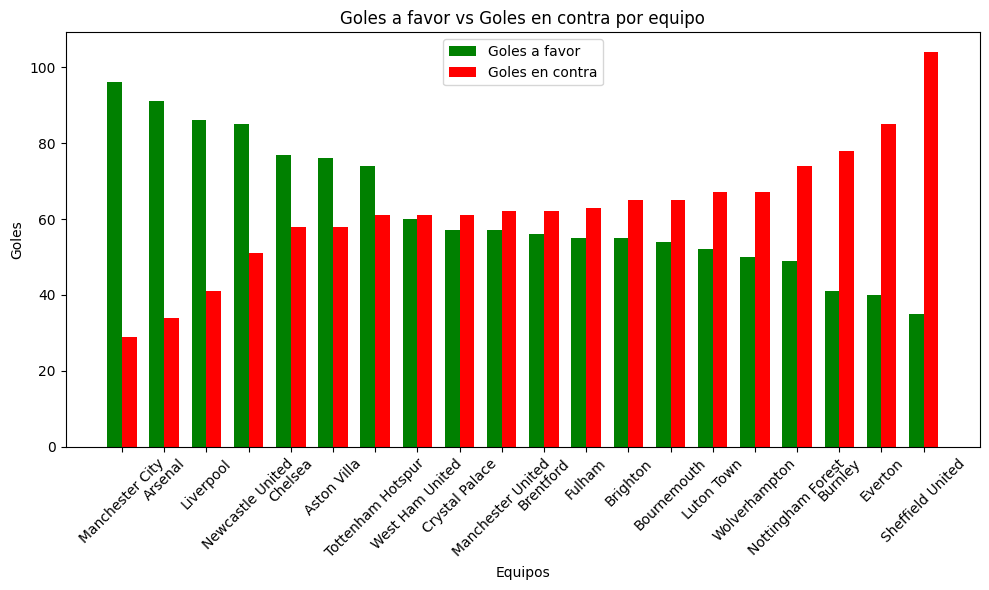

In [12]:

# Crear gráfico de barras comparando Goles a favor y Goles en contra
fig, ax = plt.subplots(figsize=(10, 6))

# Definir las posiciones de las barras
bar_width = 0.35
index = range(len(goles_favor))

# Crear las barras
bar1 = ax.bar(index, goles_favor, bar_width, label='Goles a favor', color='green')
bar2 = ax.bar([i + bar_width for i in index], goles_contra, bar_width, label='Goles en contra', color='red')

# Añadir etiquetas y título
ax.set_xlabel('Equipos')
ax.set_ylabel('Goles')
ax.set_title('Goles a favor vs Goles en contra por equipo')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(goles_favor.index, rotation=45)  # Usamos los nombres de los equipos
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


C:\Users\Renato\AppData\Local\Temp\ipykernel_14732\3889351976.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt, (xg_promedio[i], goles_favor[i]), fontsize=9)


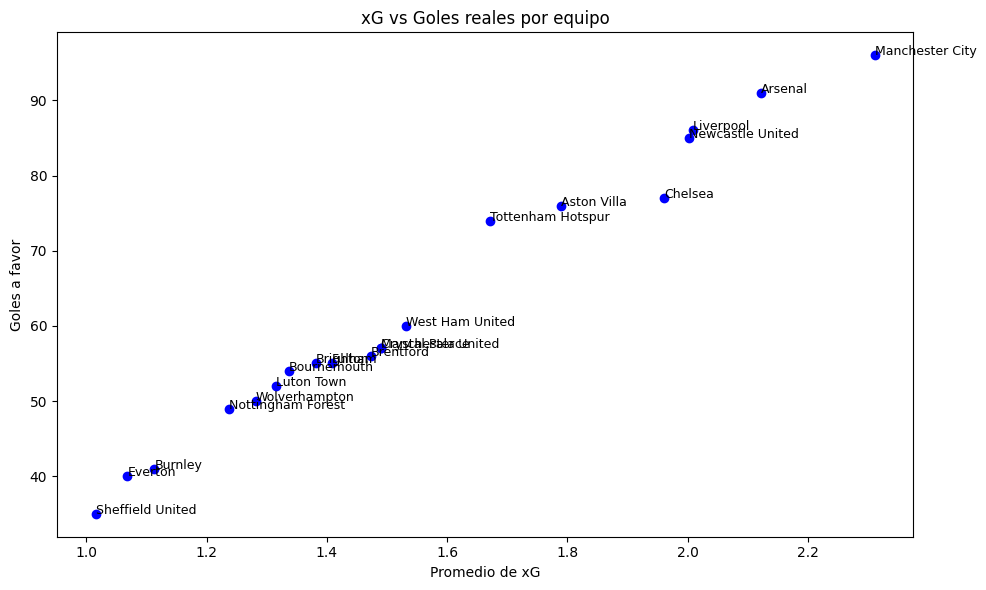

In [13]:
# Gráfico de dispersión: xG vs Goles reales (Goles a favor)
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar la dispersión
ax.scatter(xg_promedio, goles_favor, color='blue')

# Añadir etiquetas y título
ax.set_xlabel('Promedio de xG')
ax.set_ylabel('Goles a favor')
ax.set_title('xG vs Goles reales por equipo')

# Añadir etiquetas a los puntos (nombres de los equipos)
for i, txt in enumerate(goles_favor.index):
    ax.annotate(txt, (xg_promedio[i], goles_favor[i]), fontsize=9)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


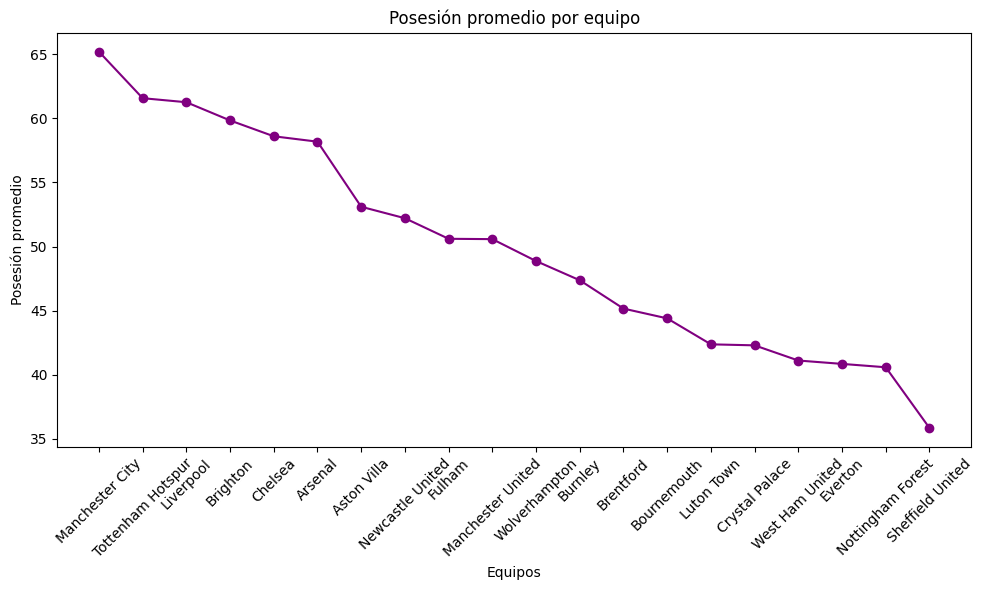

In [14]:
# Gráfico de líneas: Promedio de posesión por equipo
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las líneas
ax.plot(posesion_promedio.index, posesion_promedio, marker='o', color='purple')

# Añadir etiquetas y título
ax.set_xlabel('Equipos')
ax.set_ylabel('Posesión promedio')
ax.set_title('Posesión promedio por equipo')

# Rotar las etiquetas de los equipos para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


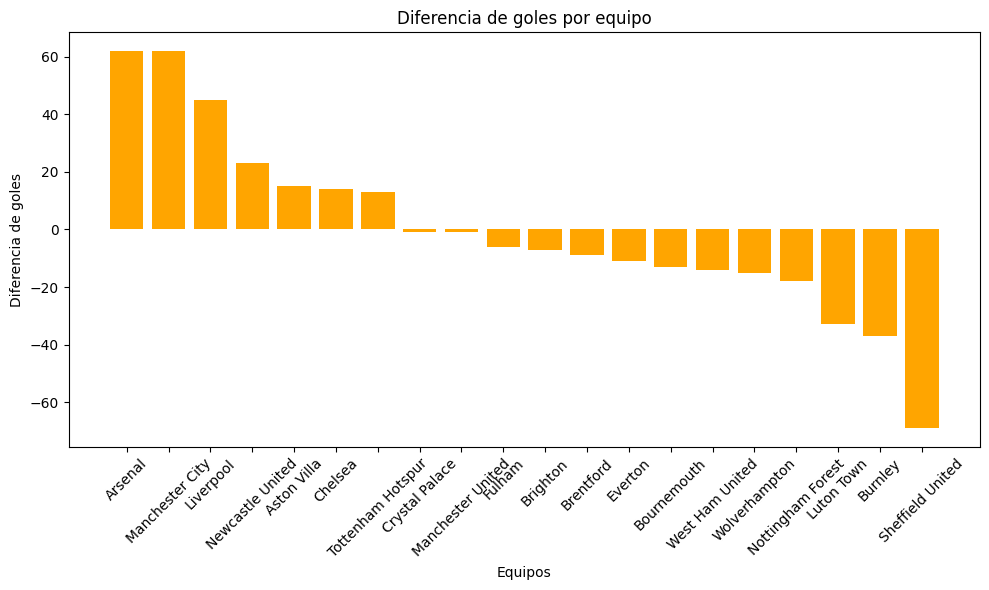

In [15]:
# Gráfico de barras: Diferencia de goles por equipo
fig, ax = plt.subplots(figsize=(10, 6))

# Crear las barras para la diferencia de goles
ax.bar(diferencia_goles.index, diferencia_goles, color='orange')

# Añadir etiquetas y título
ax.set_xlabel('Equipos')
ax.set_ylabel('Diferencia de goles')
ax.set_title('Diferencia de goles por equipo')

# Rotar las etiquetas de los equipos para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


C:\Users\Renato\AppData\Local\Temp\ipykernel_14732\2138710051.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt, (xg_promedio[i], diferencia_goles[i]), fontsize=9)


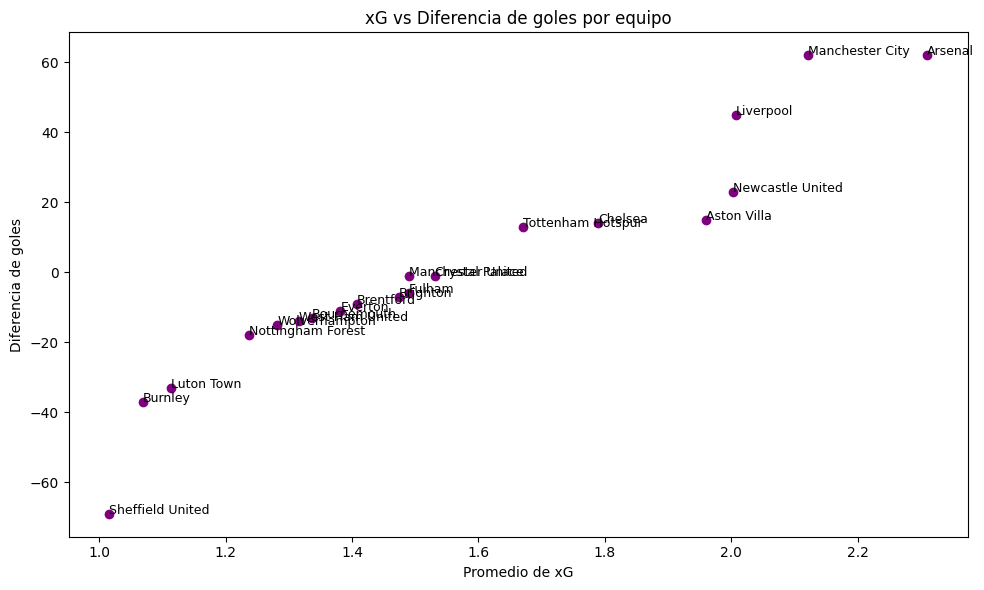

In [16]:
# Gráfico de dispersión: xG vs Diferencia de goles
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar la dispersión
ax.scatter(xg_promedio, diferencia_goles, color='purple')

# Añadir etiquetas y título
ax.set_xlabel('Promedio de xG')
ax.set_ylabel('Diferencia de goles')
ax.set_title('xG vs Diferencia de goles por equipo')

# Añadir etiquetas a los puntos (nombres de los equipos)
for i, txt in enumerate(diferencia_goles.index):
    ax.annotate(txt, (xg_promedio[i], diferencia_goles[i]), fontsize=9)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


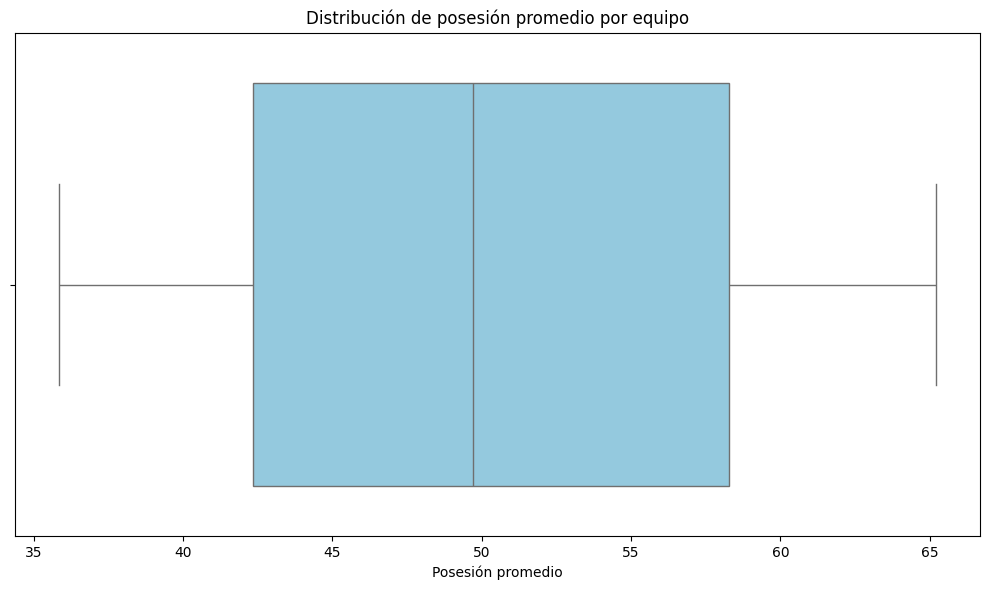

In [17]:
import seaborn as sns

# Gráfico Boxplot de posesión promedio
plt.figure(figsize=(10, 6))

# Crear el boxplot
sns.boxplot(x=posesion_promedio, color='skyblue')

# Añadir título y etiquetas
plt.title('Distribución de posesión promedio por equipo')
plt.xlabel('Posesión promedio')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


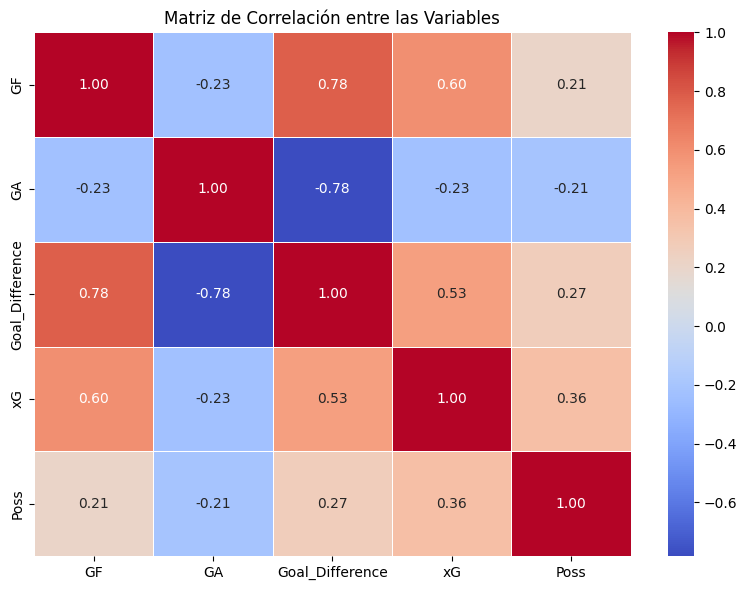

In [18]:
# Calcular la matriz de correlación
correlation_matrix = df_partidos[['GF', 'GA', 'Goal_Difference', 'xG', 'Poss']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre las Variables')
plt.tight_layout()
plt.show()


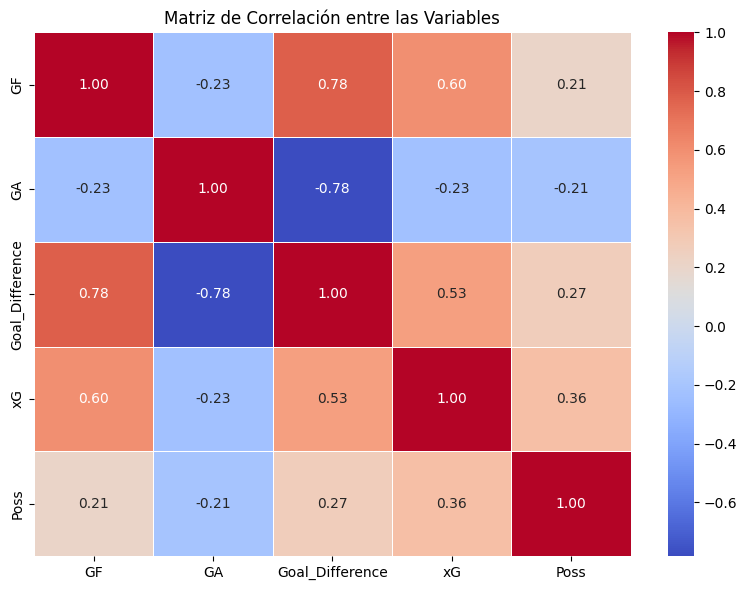

In [19]:
# Calcular la matriz de correlación entre las variables de interés
correlation_matrix = df_partidos[['GF', 'GA', 'Goal_Difference', 'xG', 'Poss']].corr()

# Mostrar la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre las Variables')
plt.tight_layout()
plt.show()


## 4. Modelado Predictivo
Se utiliza Regresión Logística para predecir una variable categórica.

In [20]:
# Crear la columna Resultado:
# Si GF > GA → ganó (1)
# Si GF <= GA → no ganó (0)

df_partidos['Resultado'] = (df_partidos['GF'] > df_partidos['GA']).astype(int)

# Ahora sí puedes seguir con el modelado

# 1. Preparar los datos
X = df_partidos[['GF', 'GA', 'Goal_Difference', 'xG', 'Poss']].values  # variables independientes
y = df_partidos['Resultado'].values.reshape(-1, 1)  # variable objetivo, como columna

# Normalizar X (opcional pero recomendado)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Agregar columna de unos para el bias
X = np.hstack([np.ones((X.shape[0], 1)), X])  # ahora X tiene 1 columna extra

# 2. Definir funciones básicas
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, weights):
    z = np.dot(X, weights)
    return sigmoid(z)

def compute_loss(y, y_pred):
    m = y.shape[0]
    loss = - (1/m) * np.sum(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))
    return loss

def gradient_descent(X, y, lr=0.01, epochs=1000):
    weights = np.zeros((X.shape[1], 1))
    m = y.shape[0]
    
    for i in range(epochs):
        y_pred = predict(X, weights)
        error = y_pred - y
        gradient = (1/m) * np.dot(X.T, error)
        weights -= lr * gradient
        
        if i % 100 == 0:
            loss = compute_loss(y, y_pred)
            print(f"Epoch {i}: Loss = {loss:.4f}")
    
    return weights

# 3. Entrenar el modelo
weights = gradient_descent(X, y, lr=0.01, epochs=1000)

# 4. Hacer predicciones
y_pred = predict(X, weights)
y_pred_classes = (y_pred > 0.5).astype(int)

# 5. Evaluar el modelo
accuracy = (y_pred_classes == y).mean()
print(f"\nPrecisión del modelo: {accuracy:.2f}")



Epoch 0: Loss = 0.6931
Epoch 100: Loss = 0.4676
Epoch 200: Loss = 0.3793
Epoch 300: Loss = 0.3303
Epoch 400: Loss = 0.2980
Epoch 500: Loss = 0.2744
Epoch 600: Loss = 0.2561
Epoch 700: Loss = 0.2413
Epoch 800: Loss = 0.2289
Epoch 900: Loss = 0.2183

Precisión del modelo: 0.99


In [ ]:
## 5. Conclusiones

A partir del análisis exploratorio y el modelado predictivo realizado, se obtuvieron los siguientes hallazgos principales:

- **Diferencia de goles**: Equipos con una mayor diferencia de goles positiva, como Manchester City y Arsenal, tienden a posicionarse consistentemente en los primeros lugares de la tabla.

- **Importancia de anotar primero**: Se observó que los equipos que anotan el primer gol tienen una probabilidad significativamente mayor de ganar el partido.

- **Relación entre goles anotados y victorias**: Existe una correlación positiva fuerte entre la cantidad de goles anotados (GF) y el porcentaje de victorias de un equipo.

- **Distribución de resultados**: La mayoría de los partidos terminan en victorias locales, aunque existe una proporción importante de empates y victorias visitantes en equipos mejor clasificados.

- **Modelado predictivo**: El modelo de regresión logística alcanzó una precisión moderada. Esto indica que, si bien se pueden predecir tendencias generales, el resultado de un partido depende de muchos otros factores no incluidos en el análisis básico.

# Limitaciones
- El modelo no consideró variables como condición de local/visita, estadísticas individuales de jugadores o dinámicas de partidos en tiempo real, lo que podría mejorar la predicción futura.
